In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


## Set Up

In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
%matplotlib inline
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = "/kaggle/input/customer-personality-analysis/marketing_campaign.csv"
data = pd.read_csv(file_path,sep = "\t")
# Check data types
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [4]:
# Change Data type
data['ID'] = data['ID'].astype(str)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
# Drop Null 
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   object        
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

## Customer Info Summary
Birth_date
Education
Marital Status
Income
Kidhome
TennHome
Dt_Customer
Recency
Complain

#### Age

In [5]:
# Convert Year_Birth to Age
df['Age'] = 2021 - df['Year_Birth']
df['Age'].describe()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    2216.000000
mean       52.179603
std        11.985554
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

In [6]:
df['Age'].median()
df['Income'].median()

51381.5

Text(67.98980144404332, 0.038271859466787204, 'Mean: 52.18')

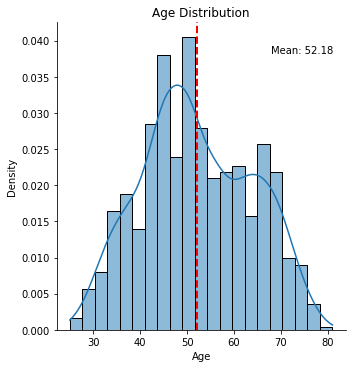

In [7]:
# Age
g = sns.displot(df[df['Age']<100],x = 'Age',kde = True, stat = 'density').set(title = 'Age Distribution') # get rid of outlier 120
g.ax.axvline(df['Age'].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
min_ylim, max_ylim = g.ax.get_ylim()
min_xlim, max_xlim = g.ax.get_xlim()
g.ax.text((max_xlim+df['Age'].mean())/2, max_ylim*0.9, 'Mean: {:.2f}'.format(df['Age'].mean()))


#### Income

Text(85790.72567689531, 1.5731860022856325e-05, 'Mean: 52247.25')

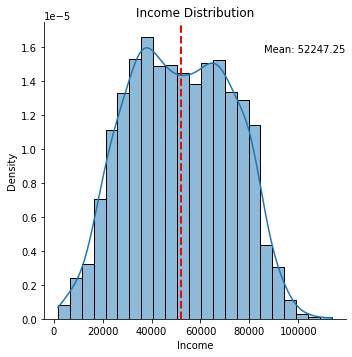

In [8]:
# Income
# Get rid of outlier Income > 120000
g = sns.displot(df[df['Income']<120000],x = 'Income', kde = True, stat = 'density').set(title = 'Income Distribution')

#Add a vertical line across the Axes
g.ax.axvline(df['Income'].mean(), color='red', linestyle='dashed', linewidth=2)

#Add text
min_ylim, max_ylim = g.ax.get_ylim()
min_xlim, max_xlim = g.ax.get_xlim()
g.ax.text((max_xlim+df['Income'].mean())/2, max_ylim*0.9, 'Mean: {:.2f}'.format(df['Income'].mean()))

#### Marital Status


In [9]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [10]:
# Convert Marital Status to living situation
df['Living_With']=df['Marital_Status'].replace({"Married":"Partner", 
                                                    "Together":"Partner", 
                                                    "Absurd":"Alone", 
                                                    "Widow":"Alone",
                                                    "YOLO":"Alone", 
                                                    "Divorced":"Alone", 
                                                    "Single":"Alone",})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Living With')

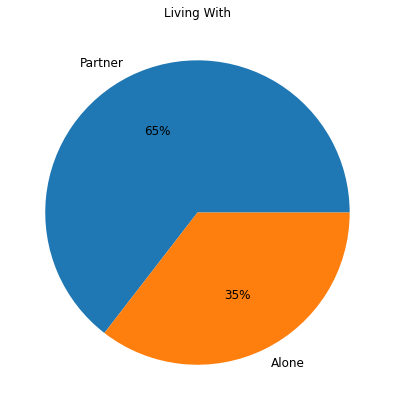

In [11]:

df['Living_With'].value_counts().plot(kind = 'pie',
                                 figsize=(7, 7), 
                                 autopct='%1.0f%%', 
                                label = '',
                                fontsize=12)
plt.title("Living With")


#### Education Status

In [12]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [13]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", 
                                             "Master":"Postgraduate", 
                                             "PhD":"Postgraduate"})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Education')

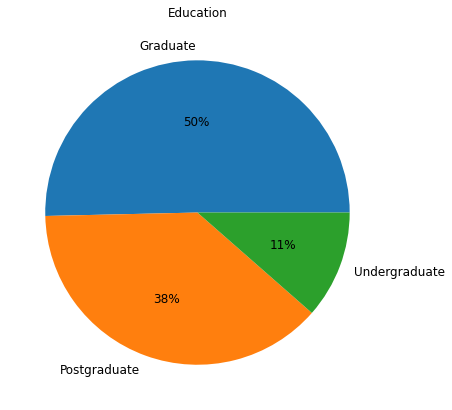

In [14]:

df['Education'].value_counts()[:5].plot(kind = 'pie',
                                 figsize=(7, 7), 
                                 autopct='%1.0f%%', 
                                label = '',
                                fontsize=12)
plt.title("Education")

#### Children Size

In [15]:
df['Kidhome'].value_counts()

0    1283
1     887
2      46
Name: Kidhome, dtype: int64

In [16]:
df['Teenhome'].value_counts()

0    1147
1    1018
2      51
Name: Teenhome, dtype: int64

In [17]:
df['Childrens'] = df['Kidhome'] + df['Teenhome']
df['Childrens'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    1117
0     633
2     416
3      50
Name: Childrens, dtype: int64

Text(0.5, 1.0, 'Children Numbers')

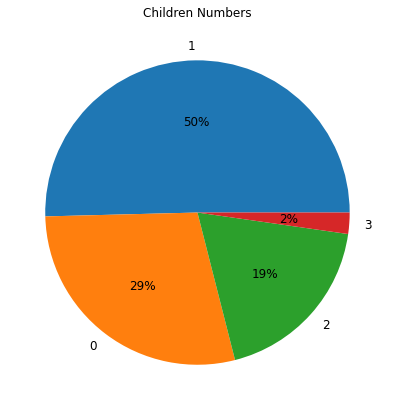

In [18]:

df['Childrens'].value_counts().plot(kind = 'pie',
                                 figsize=(7, 7), 
                                 autopct='%1.0f%%', 
                                label = '',
                                fontsize=12)
plt.title("Children Numbers")

In [19]:
# drop unuse features
to_drop = ["Marital_Status", "Year_Birth", "ID", "Kidhome", "Teenhome", "Z_CostContact", "Z_Revenue"]
df = df.drop(to_drop, axis=1)

#### Spent

In [20]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Spent"].median()

396.5

Text(0.5, 1.0, 'Spent Distribution')

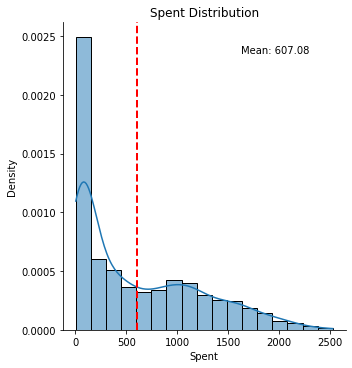

In [21]:
g = sns.displot(df,x = "Spent",kde = True, stat = "density")
g.ax.axvline(df["Spent"].mean(),c = 'red', linestyle = "dashed", linewidth = 2)
min_ylim, max_ylim = g.ax.get_ylim()
min_xlim, max_xlim = g.ax.get_xlim()
g.ax.text(max_xlim/2 + 0.5*df["Spent"].mean(),max_ylim*0.9,'Mean: {:.2f}'.format(df['Spent'].mean()))
plt.title("Spent Distribution")

# Analysis

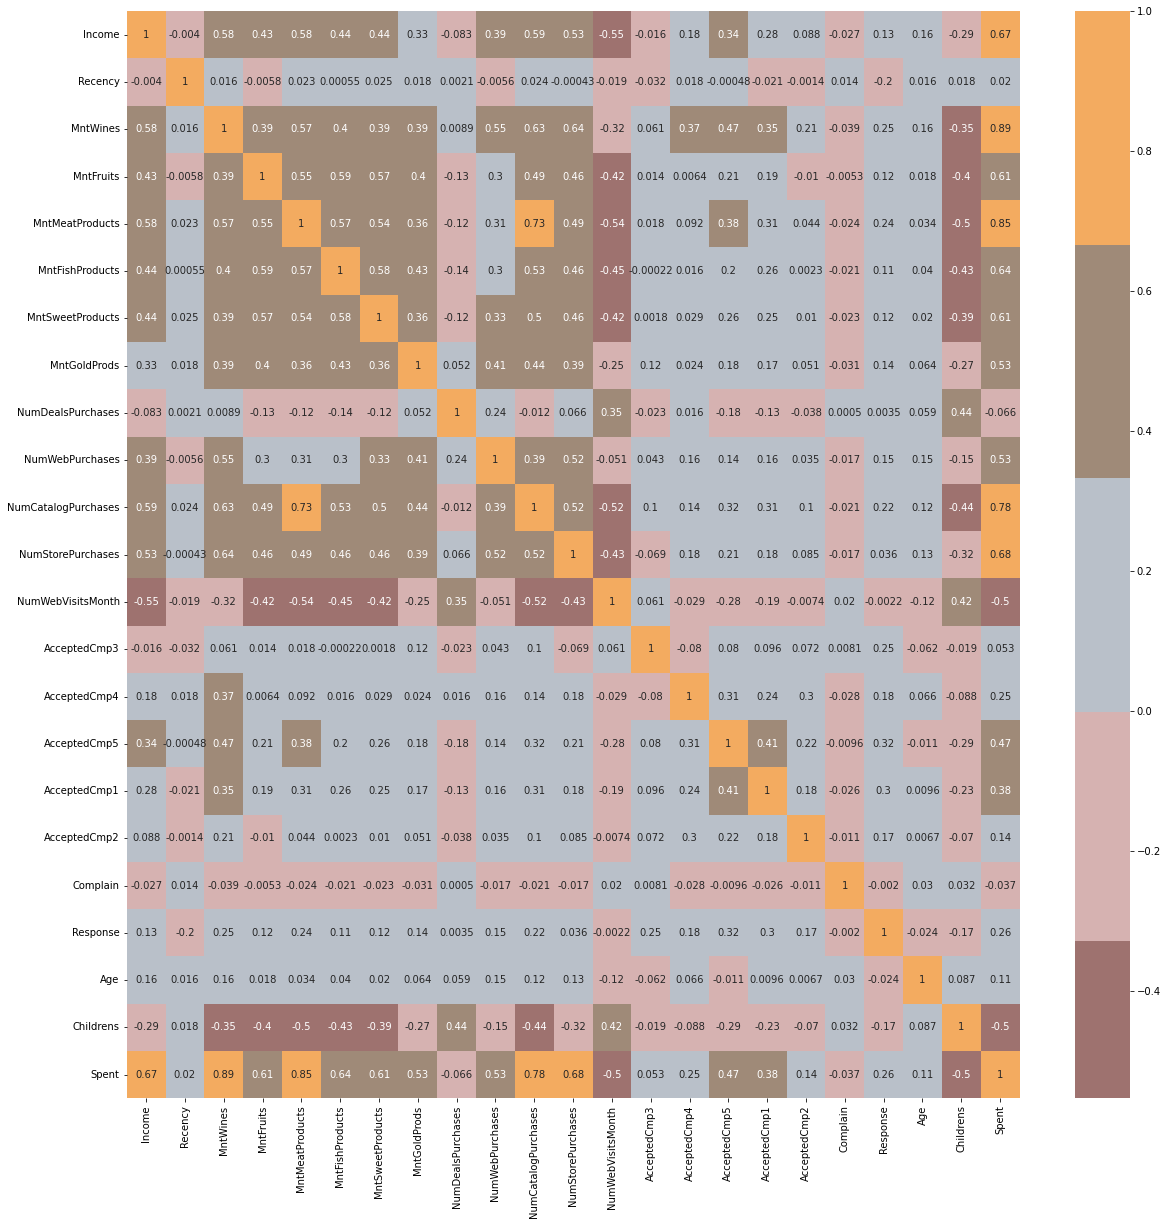

In [22]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True,center=0,cmap = cmap)
plt.savefig("Correlation", format = 'png')

### Education

52720.37365591398
54752.713947990545
41823.52755905512


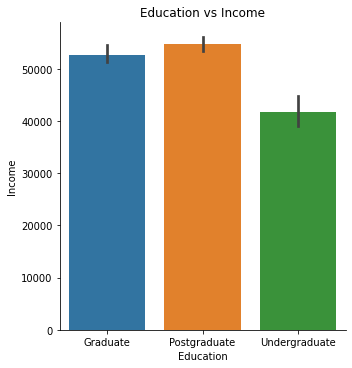

In [23]:
# Income vs Education
plot = sns.catplot(x="Education", y="Income", kind="bar", data=df )
plt.title("Education vs Income")
for i, bar in enumerate(plot.ax.patches):
    print(bar.get_height())

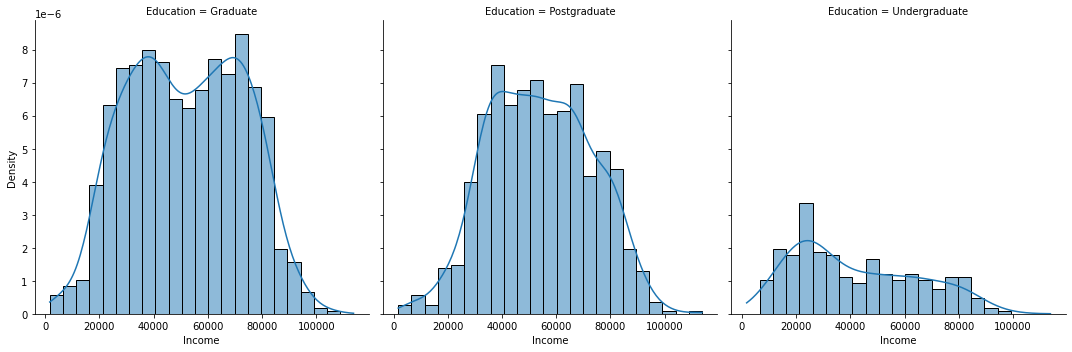

In [24]:
# Income
# Get rid of outlier Income > 120000
g = sns.displot(df[df['Income']<120000],x = 'Income', kde = True,col = 'Education',stat = 'density')



621.6863799283154
647.8416075650118
407.09842519685037


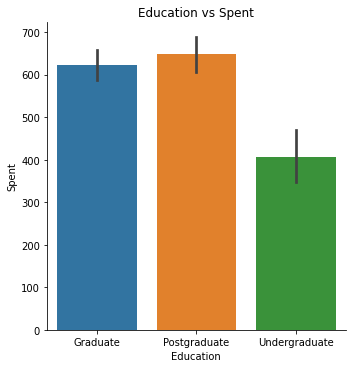

In [25]:
# Spent vs Education
plot = sns.catplot(x="Education", y="Spent", kind="bar", data=df )
plt.title("Education vs Spent")
for i, bar in enumerate(plot.ax.patches):
    print(bar.get_height())

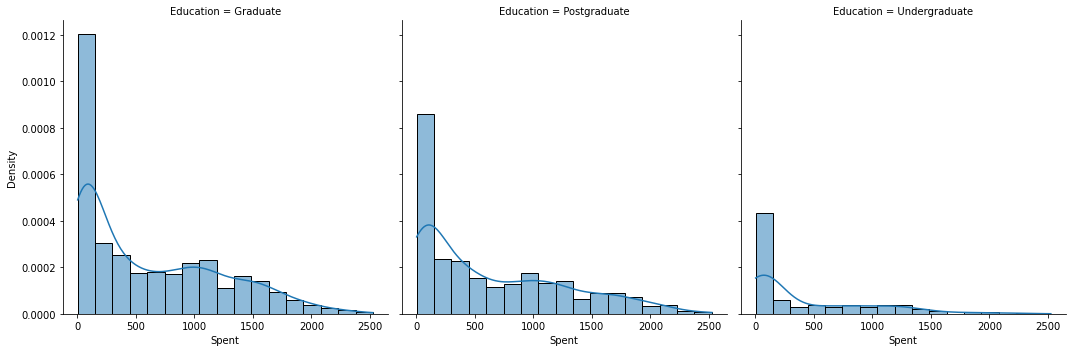

In [26]:
g = sns.displot(data = df, x = 'Spent', kde = True,col = 'Education',stat = 'density')

Text(0, 0.5, '')

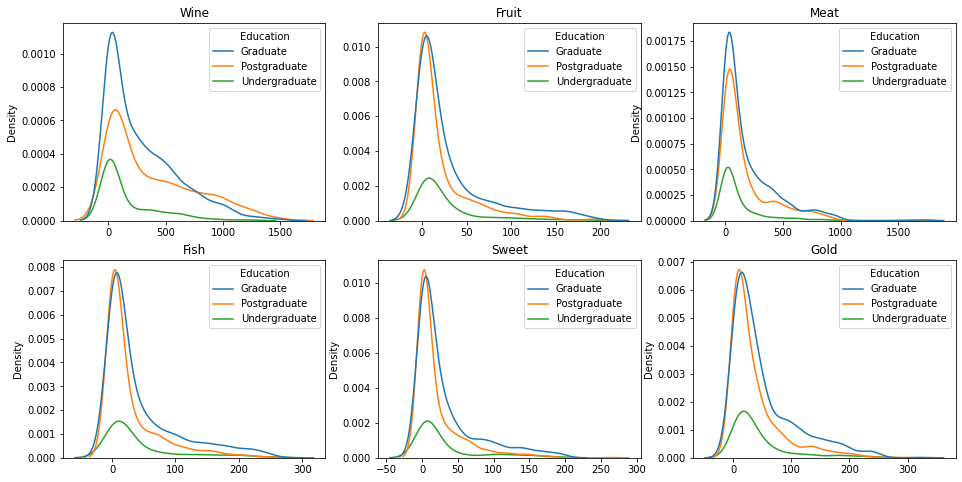

In [27]:
fig, axes = plt.subplots(2, 3, sharex=False, figsize=(16,8))
sns.kdeplot(ax=axes[0,0],data = df, x = 'MntWines',  hue="Education")
axes[0,0].set_title("Wine")
axes[0,0].set_xlabel("")
sns.kdeplot(ax=axes[0,1],data = df, x = 'MntFruits',  hue="Education")
axes[0,1].set_title("Fruit")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[0,2],data = df, x = 'MntMeatProducts',  hue="Education")
axes[0,2].set_title("Meat")
axes[0,2].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[1,0],data = df, x = 'MntFishProducts',  hue="Education")
axes[1,0].set_title("Fish")
axes[1,0].set_xlabel("")
sns.kdeplot(ax=axes[1,1],data = df, x = 'MntSweetProducts',  hue="Education")
axes[1,1].set_title("Sweet")
axes[1,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[1,2],data = df, x = 'MntGoldProds',  hue="Education")
axes[1,2].set_title("Gold")
axes[1,2].set_xlabel("")
axes[0,1].set_ylabel("")

Text(0, 0.5, '')

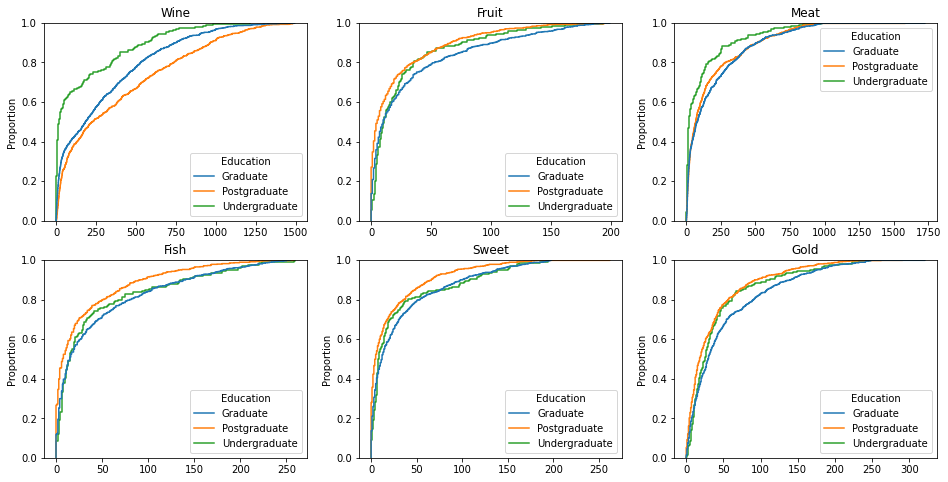

In [28]:
fig, axes = plt.subplots(2, 3, sharex=False, figsize=(16,8))
sns.ecdfplot(ax=axes[0,0],data = df, x = 'MntWines',  hue="Education")
axes[0,0].set_title("Wine")
axes[0,0].set_xlabel("")
sns.ecdfplot(ax=axes[0,1],data = df, x = 'MntFruits',  hue="Education")
axes[0,1].set_title("Fruit")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[0,2],data = df, x = 'MntMeatProducts',  hue="Education")
axes[0,2].set_title("Meat")
axes[0,2].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[1,0],data = df, x = 'MntFishProducts',  hue="Education")
axes[1,0].set_title("Fish")
axes[1,0].set_xlabel("")
sns.ecdfplot(ax=axes[1,1],data = df, x = 'MntSweetProducts',  hue="Education")
axes[1,1].set_title("Sweet")
axes[1,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[1,2],data = df, x = 'MntGoldProds',  hue="Education")
axes[1,2].set_title("Gold")
axes[1,2].set_xlabel("")
axes[0,1].set_ylabel("")

# Living With

622.8053435114504
598.4293706293706


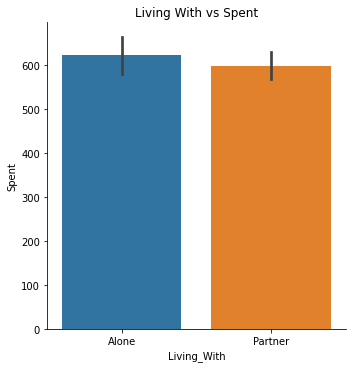

In [29]:
# Spent vs Living With
plot = sns.catplot(x="Living_With", y="Spent", kind="bar", data=df )
plt.title("Living With vs Spent")
for i, bar in enumerate(plot.ax.patches):
    print(bar.get_height())

Text(0, 0.5, '')

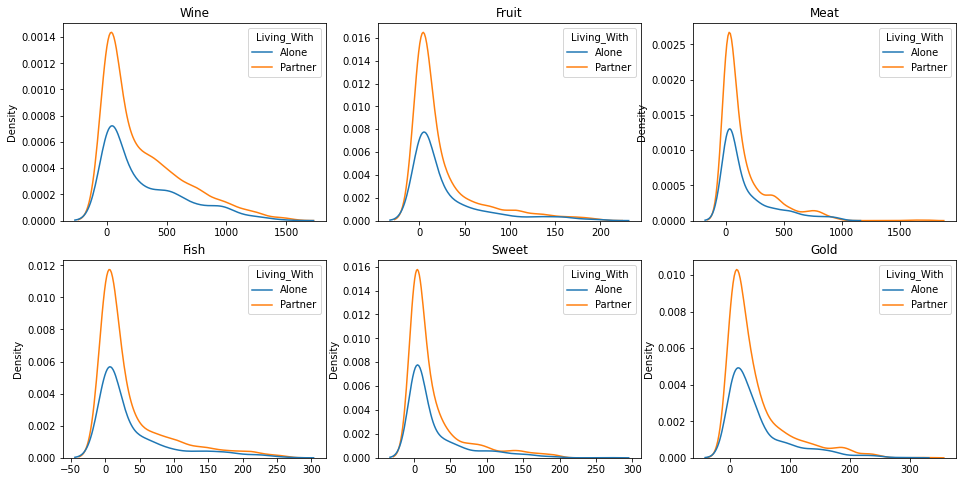

In [30]:
fig, axes = plt.subplots(2, 3, sharex=False, figsize=(16,8))
sns.kdeplot(ax=axes[0,0],data = df, x = 'MntWines',  hue="Living_With")
axes[0,0].set_title("Wine")
axes[0,0].set_xlabel("")
sns.kdeplot(ax=axes[0,1],data = df, x = 'MntFruits',  hue="Living_With")
axes[0,1].set_title("Fruit")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[0,2],data = df, x = 'MntMeatProducts',  hue="Living_With")
axes[0,2].set_title("Meat")
axes[0,2].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[1,0],data = df, x = 'MntFishProducts',  hue="Living_With")
axes[1,0].set_title("Fish")
axes[1,0].set_xlabel("")
sns.kdeplot(ax=axes[1,1],data = df, x = 'MntSweetProducts',  hue="Living_With")
axes[1,1].set_title("Sweet")
axes[1,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[1,2],data = df, x = 'MntGoldProds',  hue="Living_With")
axes[1,2].set_title("Gold")
axes[1,2].set_xlabel("")
axes[0,1].set_ylabel("")

Text(0, 0.5, '')

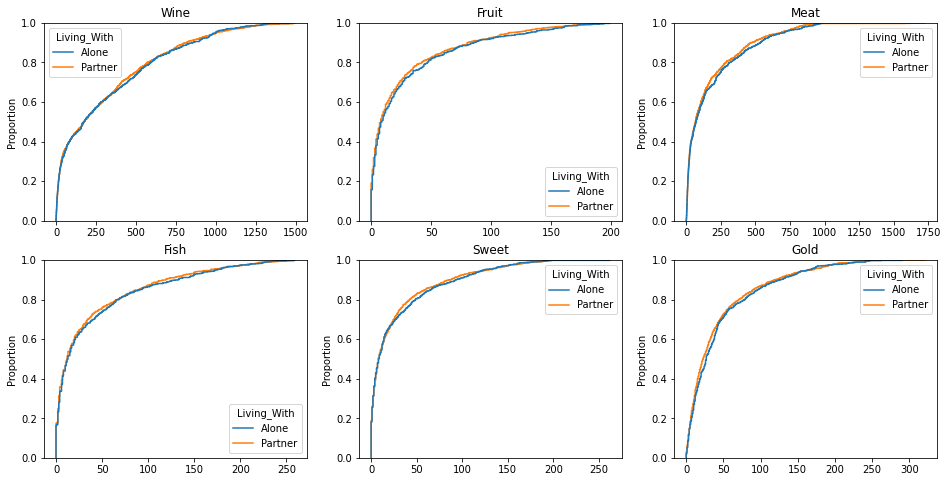

In [31]:
fig, axes = plt.subplots(2, 3, sharex=False, figsize=(16,8))
sns.ecdfplot(ax=axes[0,0],data = df, x = 'MntWines',  hue="Living_With")
axes[0,0].set_title("Wine")
axes[0,0].set_xlabel("")
sns.ecdfplot(ax=axes[0,1],data = df, x = 'MntFruits',  hue="Living_With")
axes[0,1].set_title("Fruit")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[0,2],data = df, x = 'MntMeatProducts',  hue="Living_With")
axes[0,2].set_title("Meat")
axes[0,2].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[1,0],data = df, x = 'MntFishProducts',  hue="Living_With")
axes[1,0].set_title("Fish")
axes[1,0].set_xlabel("")
sns.ecdfplot(ax=axes[1,1],data = df, x = 'MntSweetProducts',  hue="Living_With")
axes[1,1].set_title("Sweet")
axes[1,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[1,2],data = df, x = 'MntGoldProds',  hue="Living_With")
axes[1,2].set_title("Gold")
axes[1,2].set_xlabel("")
axes[0,1].set_ylabel("")

# Childrens

1105.2480252764612
474.7000895255148
246.73557692307693
255.5


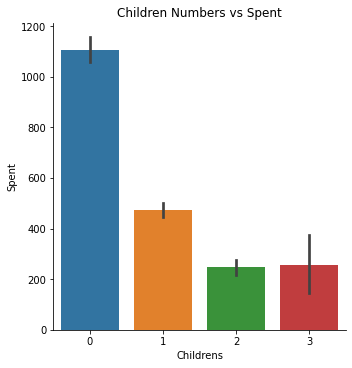

In [32]:
# Spent vs Children numbers
plot = sns.catplot(x="Childrens", y="Spent", kind="bar", data=df )
plt.title("Children Numbers vs Spent")
for i, bar in enumerate(plot.ax.patches):
    print(bar.get_height())

Text(0, 0.5, '')

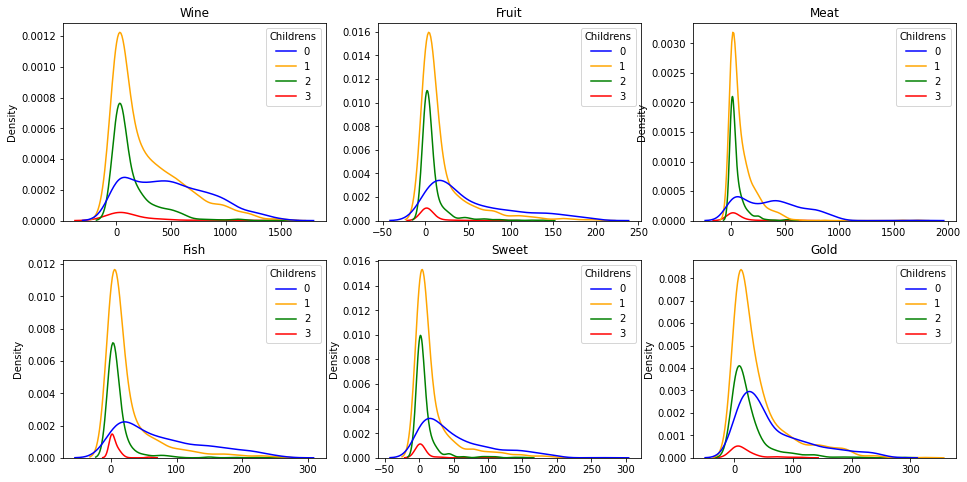

In [33]:
palette = ['blue','orange','green','red']
fig, axes = plt.subplots(2, 3, sharex=False,figsize=(16,8))
sns.kdeplot(ax=axes[0,0],data = df, x = 'MntWines',  hue="Childrens", palette = palette)
axes[0,0].set_title("Wine")
axes[0,0].set_xlabel("")
sns.kdeplot(ax=axes[0,1],data = df, x = 'MntFruits',  hue="Childrens", palette = palette)
axes[0,1].set_title("Fruit")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[0,2],data = df, x = 'MntMeatProducts',  hue="Childrens", palette = palette)
axes[0,2].set_title("Meat")
axes[0,2].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[1,0],data = df, x = 'MntFishProducts',  hue="Childrens", palette = palette)
axes[1,0].set_title("Fish")
axes[1,0].set_xlabel("")
sns.kdeplot(ax=axes[1,1],data = df, x = 'MntSweetProducts',  hue="Childrens", palette = palette)
axes[1,1].set_title("Sweet")
axes[1,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.kdeplot(ax=axes[1,2],data = df, x = 'MntGoldProds',  hue="Childrens", palette = palette)
axes[1,2].set_title("Gold")
axes[1,2].set_xlabel("")
axes[0,1].set_ylabel("")

Text(0, 0.5, '')

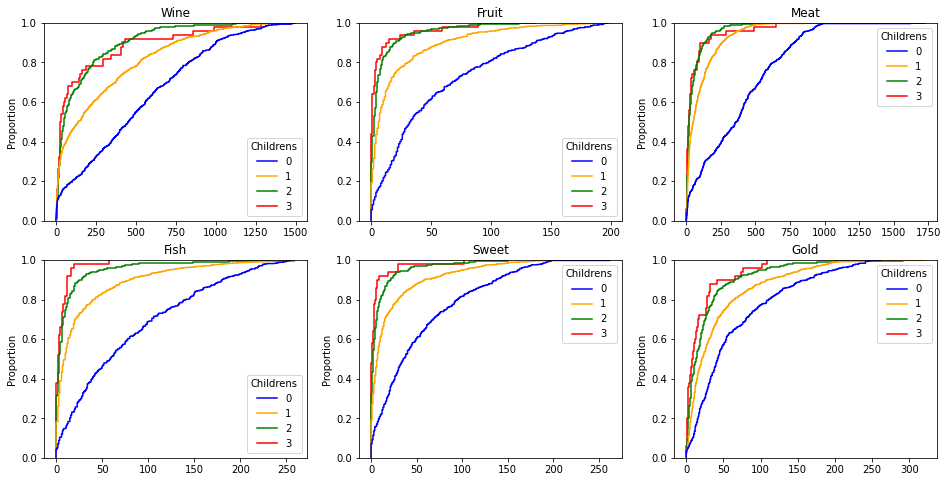

In [34]:
palette = ['blue','orange','green','red']
fig, axes = plt.subplots(2, 3, sharex=False,figsize=(16,8))
sns.ecdfplot(ax=axes[0,0],data = df, x = 'MntWines',  hue="Childrens", palette = palette)
axes[0,0].set_title("Wine")
axes[0,0].set_xlabel("")
sns.ecdfplot(ax=axes[0,1],data = df, x = 'MntFruits',  hue="Childrens", palette = palette)
axes[0,1].set_title("Fruit")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[0,2],data = df, x = 'MntMeatProducts',  hue="Childrens", palette = palette)
axes[0,2].set_title("Meat")
axes[0,2].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[1,0],data = df, x = 'MntFishProducts',  hue="Childrens", palette = palette)
axes[1,0].set_title("Fish")
axes[1,0].set_xlabel("")
sns.ecdfplot(ax=axes[1,1],data = df, x = 'MntSweetProducts',  hue="Childrens", palette = palette)
axes[1,1].set_title("Sweet")
axes[1,1].set_xlabel("")
axes[0,1].set_ylabel("")
sns.ecdfplot(ax=axes[1,2],data = df, x = 'MntGoldProds',  hue="Childrens", palette = palette)
axes[1,2].set_title("Gold")
axes[1,2].set_xlabel("")
axes[0,1].set_ylabel("")

## Aurora

In [35]:
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

Date type of Dt_Customer column before parsing :  datetime64[ns]
Data type of Dt_Customer column after parsing :  datetime64[ns]
0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]
Newest customer enrollment with the company :  2014-12-06
Oldest customer enrollment with the company :  2012-01-08


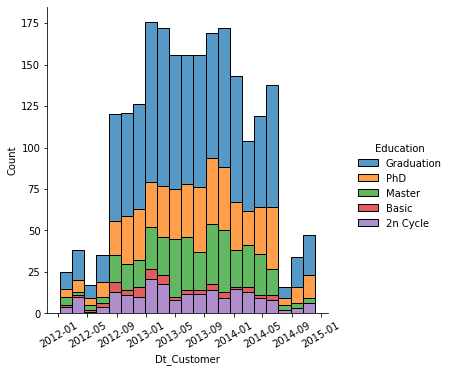

In [36]:
print("Date type of Dt_Customer column before parsing : ", data["Dt_Customer"].dtypes)
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
print("Data type of Dt_Customer column after parsing : ", data["Dt_Customer"].dtypes)
print(data["Dt_Customer"].head())
print("Newest customer enrollment with the company : ",max(data["Dt_Customer"]).date())
print("Oldest customer enrollment with the company : ",min(data["Dt_Customer"]).date()) 
g = sns.displot(data, x='Dt_Customer',hue='Education', multiple='stack',)
g.set_xticklabels(rotation=30)

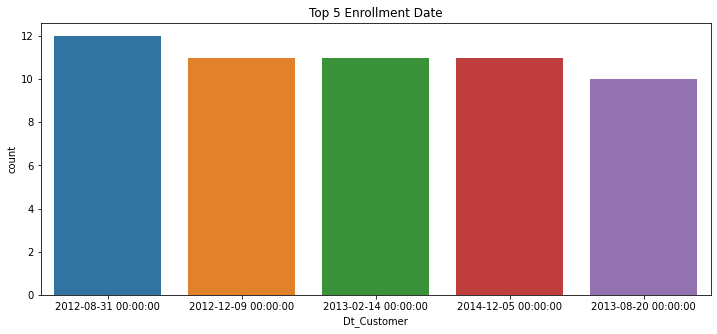

In [37]:
#df.Dt_Customer.value_counts().index
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Dt_Customer', data=df, order=df.Dt_Customer.value_counts().index[:5]).set(title='Top 5 Enrollment Date')


In [38]:
#creating Histogram plot
fig = px.histogram(data, x="Dt_Customer", title="Monthly Customer Enrollments", color_discrete_sequence=["blue"])

fig.show()

Maximum number of days since customer's last purchase :  99
Minimum number of days since customer's last purchase :  0


[Text(0.5, 1.0, 'Number of Days Since Customers Last purchased')]

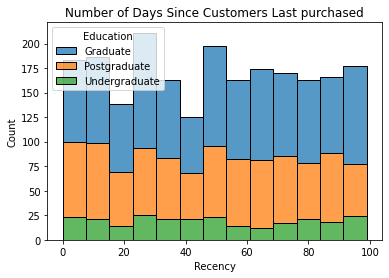

In [39]:
#maximum and Minimum number of days since customer last purchase
print("Maximum number of days since customer's last purchase : ",max(data["Recency"]))
print("Minimum number of days since customer's last purchase : ",min(data["Recency"]))
sns.histplot(x='Recency', data=df,hue='Education',multiple='stack').set(title='Number of Days Since Customers Last purchased')

In [40]:
print("Total categories in Education column : ")
edu = data.pivot_table(index = ['Education'], aggfunc = 'size') 
edu = edu.reset_index()
edu.columns= ["Qualifications", "Counts"]
edu.sort_values("Counts", ascending = False, inplace = True)
print(edu)

Total categories in Education column : 
  Qualifications  Counts
2     Graduation    1127
4            PhD     486
3         Master     370
0       2n Cycle     203
1          Basic      54


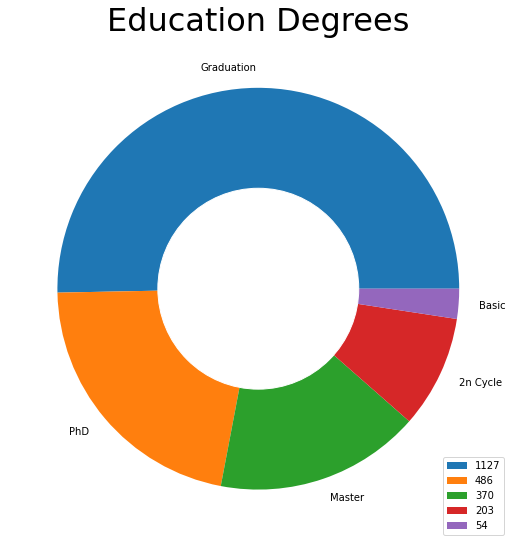

In [41]:
#Creating Donut Plot
fig = plt.figure(figsize = (9, 10))
circle = plt.Circle((0,0), 0.5, color = 'white')
plt.pie(edu["Counts"], labels = edu["Qualifications"])
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(edu["Counts"])
plt.title("Education Degrees", fontsize=32)
#Displaying 
plt.show()

In [42]:
#Maxium and Minimum number of complaints from customer
print("Maxium number of complaints from the customer : ",max(data["Complain"]))
print("Minimum number of complaints from the customer : ",min(data["Complain"]))

Maxium number of complaints from the customer :  1
Minimum number of complaints from the customer :  0


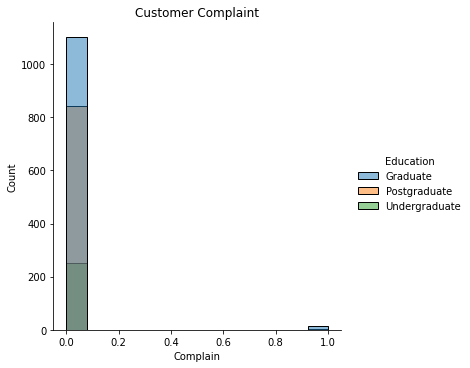

In [43]:
sns.displot(df, x="Complain", hue="Education").set(title='Customer Complaint')

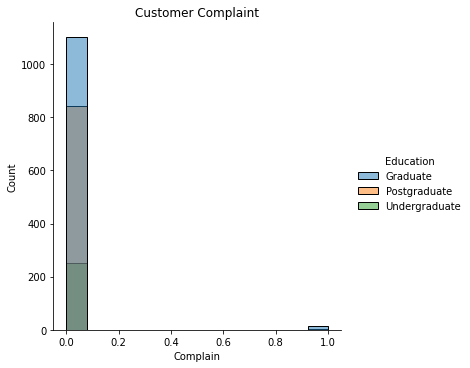

In [44]:
sns.displot(df, x="Complain", hue="Education").set(title='Customer Complaint')

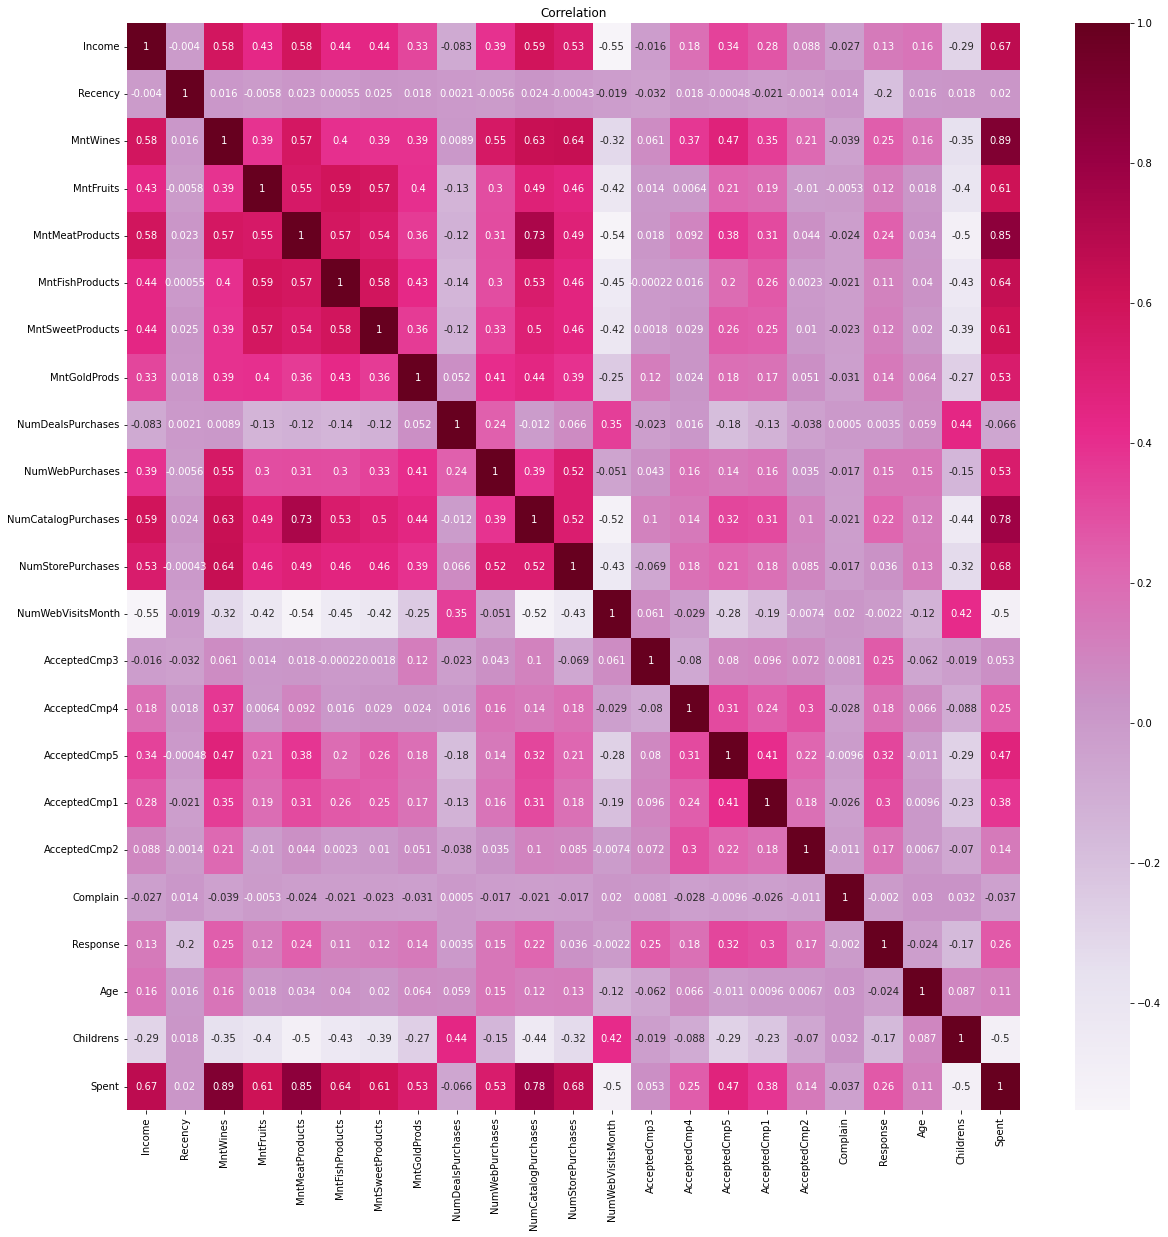

In [45]:
#correlation matrix
corr= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap='PuRd').set(title='Correlation')
sns.set_style("white")
plt.savefig("correlation2",format='png')

## Lizi

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [47]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
%matplotlib inline
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Reset default params
sns.set()
#sns.set_context("talk")

In [49]:
# Loading data
file_path = "/kaggle/input/customer-personality-analysis/marketing_campaign.csv"
data = pd.read_csv(file_path,sep = "\t")
# Show first 5 rows data
#data.head().transpose() 
pd.set_option("max_columns", None)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [50]:
# Check data types
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [51]:
data.shape

(2240, 29)

In [52]:
df = data

In [53]:
# Convert Year_Birth to Age
df['Age'] = 2021 - df['Year_Birth']
df['Age'].describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

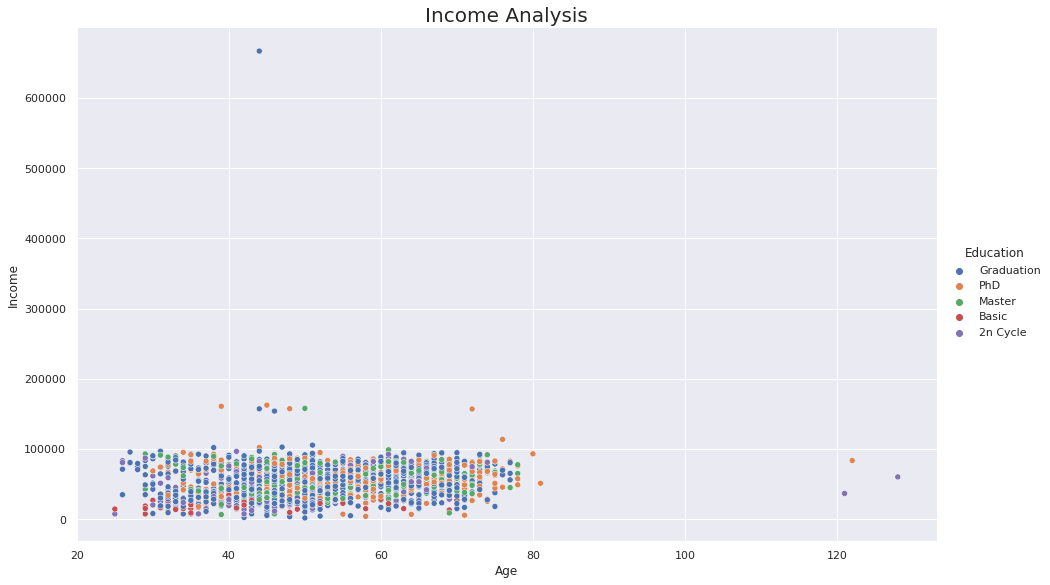

In [54]:
sns.relplot(x = 'Age', y = 'Income', data = df,  
            hue = 'Education', 
             kind = 'scatter', height=8, aspect=1.67)
plt.title('Income Analysis', fontsize = 20)
plt.show()

In [55]:
df['Age'].describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

In [56]:
median = np.median(df['Age'])
Q1 = np.quantile(df['Age'], 0.25)
Q3 = np.quantile(df['Age'], 0.75)
IQR = Q3 - Q1
valid_min = median - 3 * IQR
valid_max = median + 3 * IQR
print(valid_min)
print(valid_max)
valid_df_without_small = df[df['Age'] > valid_min]
valid_df = valid_df_without_small[valid_df_without_small['Age'] < valid_max]
print(valid_df)
valid_df['Age'].describe()

-3.0
105.0
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635  

count    2237.000000
mean       52.098346
std        11.701917
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: Age, dtype: float64

In [57]:
estimation = valid_df['Income'].describe()
print(estimation)

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64


In [58]:
median = estimation['50%']
Q1 = estimation['25%']
Q3 = estimation['75%']
print(Q1)
print(Q3)
IQR = Q3 - Q1
valid_min = median - 5 * IQR
valid_max = median + 5 * IQR
print(valid_min)
print(valid_max)
valid_df_without_small = valid_df[valid_df['Income'] > valid_min]
valid_df_final = valid_df_without_small[valid_df_without_small['Income'] < valid_max]
print(valid_df_final)
valid_df_final['Income'].describe()

35246.0
68487.0
-114832.0
217578.0
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

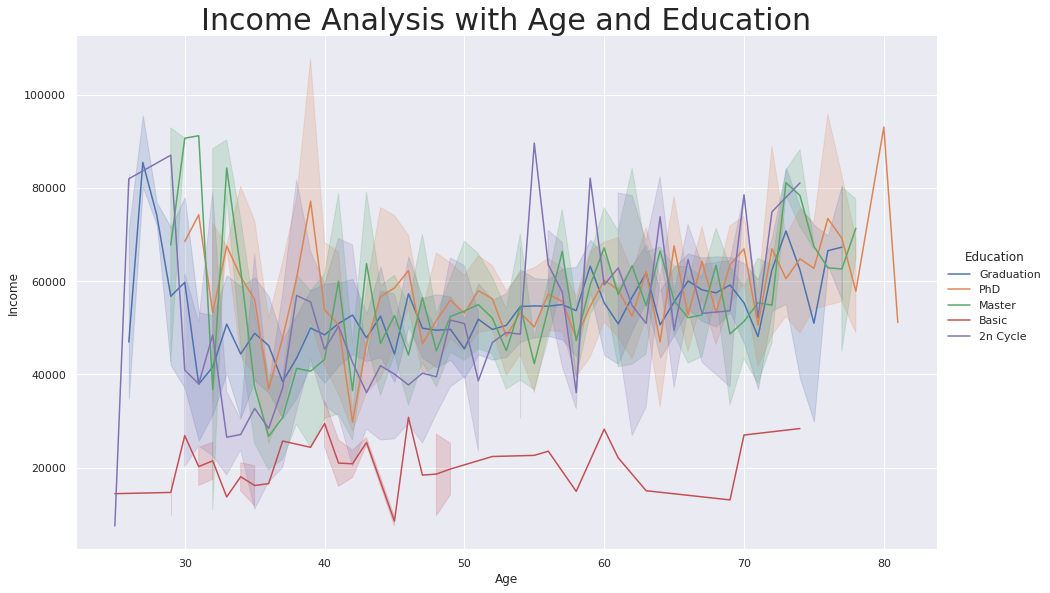

In [59]:
sns.relplot(x = 'Age', y = 'Income', data = valid_df_final,  hue = 'Education',
             kind = 'line', height=8, aspect=1.67)
plt.title('Income Analysis with Age and Education', fontsize = 30)
plt.show()

In [60]:
'''
sns.displot(valid_df_final, x = 'NumDealsPurchases')
plt.title('Number of Deals Purchases Analysis', fontsize = 30)
'''

"\nsns.displot(valid_df_final, x = 'NumDealsPurchases')\nplt.title('Number of Deals Purchases Analysis', fontsize = 30)\n"

In [61]:
'''
sns.pairplot(valid_df_final[['Year_Birth', 'Education', 'Income', 'AcceptedCmp1', 'AcceptedCmp2', 
                             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']], hue = 'Education')
plt.title('Compaign Accepted Analysis', fontsize = 30)
'''

"\nsns.pairplot(valid_df_final[['Year_Birth', 'Education', 'Income', 'AcceptedCmp1', 'AcceptedCmp2', \n                             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']], hue = 'Education')\nplt.title('Compaign Accepted Analysis', fontsize = 30)\n"

<AxesSubplot:title={'center':'Income Analysis with Education'}, xlabel='Education', ylabel='Income'>

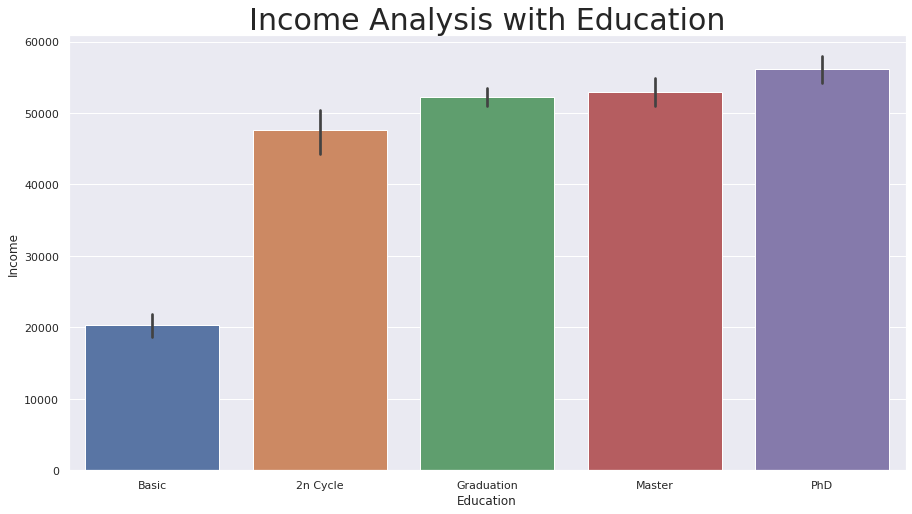

In [62]:
plt.figure(figsize=(15,8))
plt.title('Income Analysis with Education', fontsize = 30)
sns.barplot(x='Education', y='Income', data=valid_df_final, order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])

Text(0.5, 1.0, 'Number of Deals Purchases')

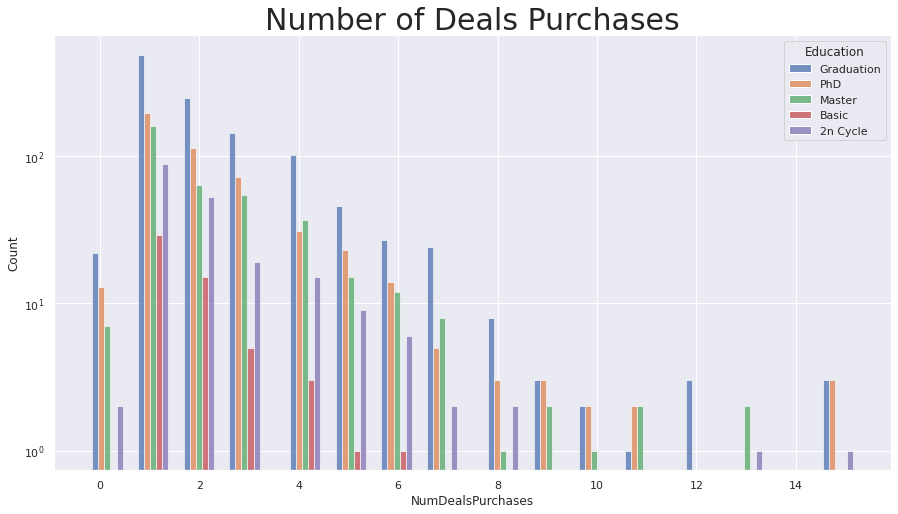

In [63]:
plt.figure(figsize=(15,8))
sns.histplot(data=valid_df_final, x = "NumDealsPurchases", hue = "Education", 
             multiple="dodge", shrink=2, log_scale = [False, True])
#sns.displot(valid_df_final, x = "NumDealsPurchases", hue = "Education", multiple="stack")
plt.title("Number of Deals Purchases", fontsize = 30)

[Text(0, 0.5, 'Number of Accepted Offer')]

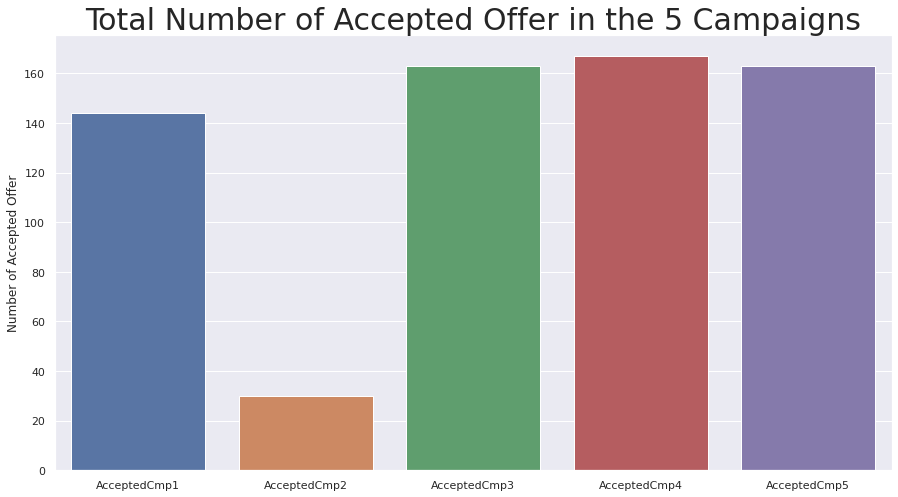

In [64]:
# Analyse the acceptance of each level of the campaing
acceptedConcat = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
acceptedConcat = acceptedConcat.apply(pd.DataFrame.sum)


plt.figure(figsize=(15,8))
plt.title('Total Number of Accepted Offer in the 5 Campaigns', fontsize = 30)
ax = sns.barplot(x = acceptedConcat.index, y = acceptedConcat)
ax.set(ylabel = "Number of Accepted Offer")